In [18]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   #if like me you do not have a lot of memory in your GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "" #then these two lines force keras to use your CPU
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf

In [2]:
def array_to_color(array, cmap="Oranges"):
    s_m = plt.cm.ScalarMappable(cmap=cmap)
    return s_m.to_rgba(array)[:,:-1]


def rgb_data_transform(data):
    data_t = []
    for i in range(data.shape[0]):
        data_t.append(array_to_color(data[i]).reshape(16, 16, 16, 3))
    return np.asarray(data_t, dtype=np.float32)

In [3]:

with h5py.File("archive/full_dataset_vectors.h5", "r") as hf:    

    # Split the data into training/test features/targets
    X_train = hf["X_train"][:]
    targets_train = hf["y_train"][:]
    X_test = hf["X_test"][:] 
    targets_test = hf["y_test"][:]

    # Determine sample shape
    sample_shape = (16, 16, 16, 3)

    # Reshape data into 3D format
    X_train = rgb_data_transform(X_train)
    X_test = rgb_data_transform(X_test)

    # Convert target vectors to categorical targets
    targets_train = to_categorical(targets_train).astype(np.integer)
    targets_test = to_categorical(targets_test).astype(np.integer)

C:\Users\HP Gaming\AppData\Local\Temp\ipykernel_9236\2501731755.py:17: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  targets_train = to_categorical(targets_train).astype(np.integer)
C:\Users\HP Gaming\AppData\Local\Temp\ipykernel_9236\2501731755.py:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  targets_test = to_categorical(targets_test).astype(np.integer)


In [4]:
X_train.shape

(10000, 16, 16, 16, 3)

In [5]:
X_test.shape

(2000, 16, 16, 16, 3)

In [6]:
# Create the model
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()
# Fit data to model
history = model.fit(X_train, targets_train,
            batch_size=128,
            epochs=40,
            verbose=1,
            validation_split=0.3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 14, 14, 14, 32)    2624      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 7, 7, 7, 32)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 7, 32)      128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 7, 7, 7, 32)       0         
                                                                 
 conv3d_1 (Conv3D)           (None, 5, 5, 5, 64)       55360     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 2, 2, 2, 64)      0

c:\Program Files\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/40
55/55 [==============================] - 48s 849ms/step - loss: 2.2884 - accuracy: 0.2494 - val_loss: 2.6920 - val_accuracy: 0.1150
Epoch 2/40
55/55 [==============================] - 36s 664ms/step - loss: 1.7320 - accuracy: 0.4027 - val_loss: 3.2534 - val_accuracy: 0.1607
Epoch 3/40
55/55 [==============================] - 38s 691ms/step - loss: 1.5322 - accuracy: 0.4644 - val_loss: 2.0121 - val_accuracy: 0.3310
Epoch 4/40
55/55 [==============================] - 42s 767ms/step - loss: 1.4023 - accuracy: 0.5017 - val_loss: 3.5165 - val_accuracy: 0.1577
Epoch 5/40
55/55 [==============================] - 35s 645ms/step - loss: 1.3211 - accuracy: 0.5311 - val_loss: 2.8678 - val_accuracy: 0.2647
Epoch 6/40
55/55 [==============================] - 35s 636ms/step - loss: 1.2702 - accuracy: 0.5440 - val_loss: 2.6904 - val_accuracy: 0.3213
Epoch 7/40
55/55 [==============================] - 35s 635ms/step - loss: 1.2257 - accuracy: 0.5640 - val_loss: 2.7716 - val_accuracy: 0.2933

In [7]:
model.evaluate(X_test, targets_test)

63/63 [==============================] - 2s 34ms/step - loss: 2.2716 - accuracy: 0.4760


[2.271618366241455, 0.47600001096725464]

In [14]:
X_test.shape

(2000, 16, 16, 16, 3)

In [15]:
targets_test.shape

(2000, 10)

In [11]:
targets_test[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [8]:
predicted = model.predict(X_test)

63/63 [==============================] - 5s 42ms/step


In [21]:
#predicted[0]

predicted_labels = [np.argmax(i) for i in predicted]
predicted_labels[:5]

[7, 7, 2, 5, 1]

In [10]:
np.argmax(predicted[0])

7

In [25]:
target_labels = [np.argmax(i) for i in targets_test]
target_labels[:5]

[7, 7, 2, 2, 1]

In [16]:
np.argmax(predicted[2])

2

In [26]:
cm = tf.math.confusion_matrix(labels = target_labels, predictions= predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

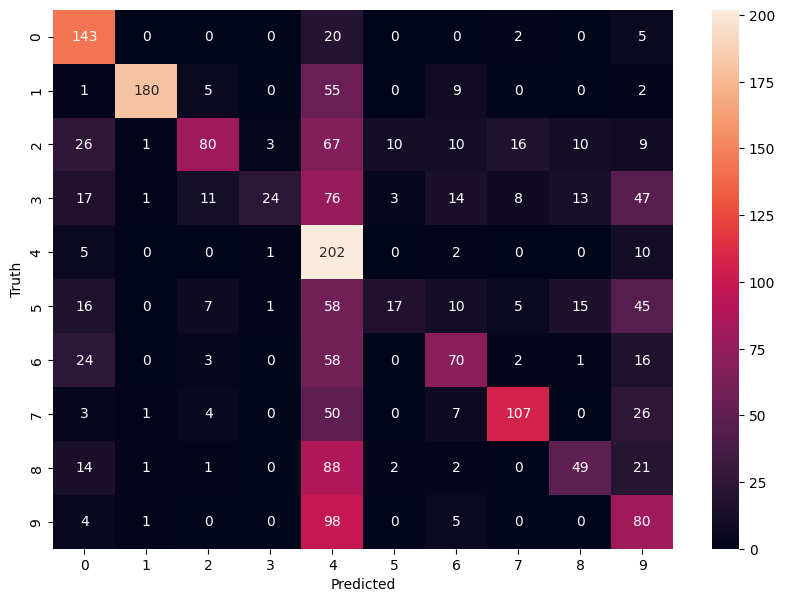

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')